In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\python file\\pranawa\\data\\diabetes_d0c94948-6544-44e6-b01f-28bf2dd7f344.csv")
data.head(2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
X = data.drop('Outcome', axis=1)

In [6]:
y=data['Outcome']

In [7]:
X.shape,y.shape

((768, 8), (768,))

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [10]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [11]:
classifier.fit(x_train,y_train)

c:\Users\LENOVO\Desktop\python file\pranawa\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
predictions = classifier.predict(x_test)

In [13]:
from sklearn.metrics import recall_score,precision_score,f1_score 


In [14]:
recall_score(y_test,predictions)

0.5961538461538461

In [15]:
precision_score(y_test,predictions)

0.6078431372549019

In [16]:
f1_score(y_test,predictions) 

0.6019417475728155

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier1=DecisionTreeClassifier()
dt_classifier1.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
dt1_preds=dt_classifier1.predict(x_test)

In [19]:
precision_score(y_test,dt1_preds)

0.6428571428571429

In [20]:
recall_score(y_test,dt1_preds)

0.6923076923076923

In [21]:
dt_classifier2=DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=42)
dt_classifier2.fit(x_train, y_train)
dt2_preds=dt_classifier2.predict(x_test)
print(
    precision_score(y_test, dt2_preds),
    recall_score(y_test, dt2_preds)  
)

0.5686274509803921 0.5576923076923077


In [22]:
from sklearn.svm import SVC
svc_classifier=SVC()
svc_classifier.fit(x_train,y_train)
svc_preds=svc_classifier.predict(x_test)
print(
    precision_score(y_test, svc_preds),
    recall_score(y_test, svc_preds)  
)

0.6 0.46153846153846156


In [23]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Outlier

<Axes: >

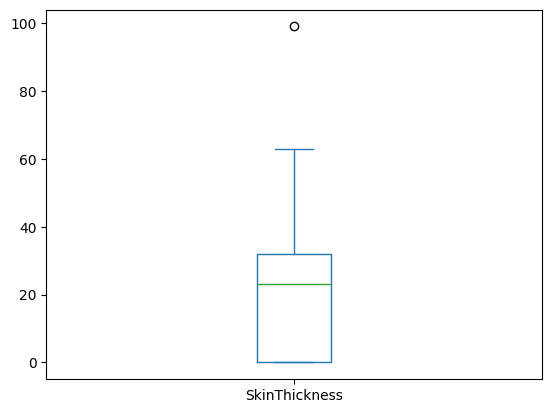

In [24]:
data['SkinThickness'].plot.box()

In [25]:
q1=data['SkinThickness'].quantile(0.25)
q3=data['SkinThickness'].quantile(0.75)
iqr = q3- q1
q1,q3,iqr


(np.float64(0.0), np.float64(32.0), np.float64(32.0))

In [26]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print(upper_limit,lower_limit)

80.0 -48.0


In [27]:
data['SkinThickness'].min() , data['SkinThickness'].max()

(np.int64(0), np.int64(99))

In [28]:
upper_limit=(
    data['SkinThickness'].max()
    if(q3+1.5*iqr)>data['SkinThickness'].max()
    else(q3+1.5*iqr)
)

lower_limit=(
    data['SkinThickness'].min()
    if(q1-1.5*iqr)<data['SkinThickness'].min()
    else(q1-1.5*iqr)
)
lower_limit,upper_limit

(np.int64(0), np.float64(80.0))

In [29]:
upper_limit=(
    data['SkinThickness'].max()
    if(val:=q3+1.5*iqr)>(max_val:=data['SkinThickness'].max())
    else val
)

lower_limit=(
    data['SkinThickness'].min()
    if(q1-1.5*iqr)<data['SkinThickness'].min()
    else(q1-1.5*iqr)
)
lower_limit,upper_limit

(np.int64(0), np.float64(80.0))

In [30]:
data['SkinThickness']>upper_limit

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Name: SkinThickness, Length: 768, dtype: bool

In [31]:
sum(data['SkinThickness']>upper_limit)

1

In [32]:
sum(data['SkinThickness']<lower_limit)

0

In [33]:
data[data['SkinThickness']>upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [34]:
data['SkinThickness'][
    data['SkinThickness']>upper_limit
]

579    99
Name: SkinThickness, dtype: int64

In [35]:
data.loc[
    data['SkinThickness']>upper_limit,"SkinThickness"
]=upper_limit

In [36]:
sum(data['SkinThickness']>upper_limit)

0